In [67]:
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Import of the original dataset

In [114]:
# Find this dataset at https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
df = pd.read_csv("csv/diabetes_012_health_indicators_BRFSS2015.csv")

# Print column labels
print("Column labels:", df.columns)
variable_descriptions = {
    "Diabetes_012": "Diabetes status: 0 = no diabetes, 1 = prediabetes, 2 = diabetes",
    "HighBP": "High Blood Pressure: 0 = no high BP, 1 = high BP",
    "HighChol": "High Cholesterol: 0 = no high cholesterol, 1 = high cholesterol",
    "CholCheck": "Cholesterol check in past 5 years: 0 = no, 1 = yes",
    "BMI": "Body Mass Index",
    "Smoker": "Have smoked at least 100 cigarettes in lifetime: 0 = no, 1 = yes",
    "Stroke": "Ever had a stroke: 0 = no, 1 = yes",
    "HeartDiseaseorAttack": "Coronary heart disease or myocardial infarction: 0 = no, 1 = yes",
    "PhysActivity": "Physical activity in past 30 days (excluding job): 0 = no, 1 = yes",
    "Fruits": "Consume fruit 1 or more times per day: 0 = no, 1 = yes",
    "Veggies": "Consume vegetables 1 or more times per day: 0 = no, 1 = yes",
    "HvyAlcoholConsump": "Heavy drinker (men >14 drinks/week, women >7 drinks/week): 0 = no, 1 = yes",
    "AnyHealthcare": "Have any kind of health care coverage: 0 = no, 1 = yes",
    "NoDocbcCost": "Could not see doctor due to cost in past 12 months: 0 = no, 1 = yes",
    "GenHlth": "General health status: 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor",
    "MentHlth": "Number of days mental health was not good in past 30 days (1-30)",
    "PhysHlth": "Number of days physical health was not good in past 30 days (1-30)",
    "DiffWalk": "Serious difficulty walking or climbing stairs: 0 = no, 1 = yes",
    "Sex": "Sex: 0 = female, 1 = male",
    "Age": "Age category: 1 = 18-24, 9 = 60-64, 13 = 80 or older",
    "Education": "Education level: 1 = Never attended school or only kindergarten, 2 = Grades 1-8, 3 = Grades 9-11, 4 = Grade 12 or GED, 5 = Some college, 6 = College graduate",
    "Income": "Income level: 1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more"
}

# Print the first rows (default is 5 rows, you can specify how many with df.head(n))
# print("\nFirst rows of the DataFrame:")
# print(df.loc[0])

# Categorical Variables
nominal_vars = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker',
    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'DiffWalk', 'Sex'
]

ordinal_vars = [
    'Education', 'Income'
]

# quantitative Variables
quantitative_vars = [
    'BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age'
]

categorical_vars = ordinal_vars + nominal_vars

response_var = 'Diabetes_012'

df_nominal = df[nominal_vars]
df_ordinal = df[ordinal_vars]
df_quantitative = df[quantitative_vars]
df_categorical = df[categorical_vars]

Column labels: Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


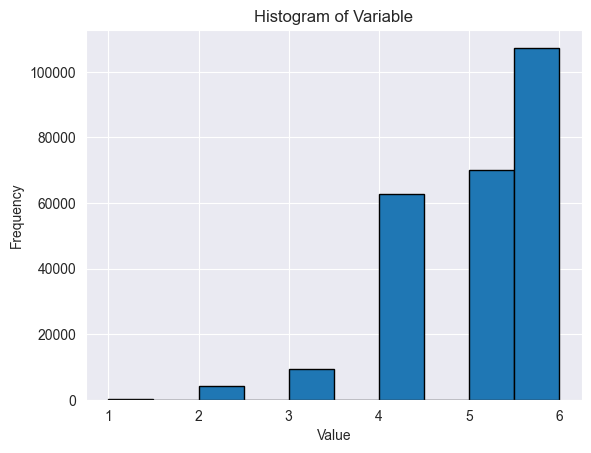

In [115]:
plt.hist(df['Education'], bins=10, edgecolor='black')
plt.title('Histogram of Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [116]:
df_numerical = df[quantitative_vars + ordinal_vars].copy()
# df_samples = df.sample(n=10000) 
df_numerical

,BMI,MentHlth,PhysHlth,GenHlth,Age,Education,Income
0,40.0,18.0,15.0,5.0,9.0,4.0,3.0
1,25.0,0.0,0.0,3.0,7.0,6.0,1.0
2,28.0,30.0,30.0,5.0,9.0,4.0,8.0
3,27.0,0.0,0.0,2.0,11.0,3.0,6.0
4,24.0,3.0,0.0,2.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...
253675,45.0,0.0,5.0,3.0,5.0,6.0,7.0
253676,18.0,0.0,0.0,4.0,11.0,2.0,4.0
253677,28.0,0.0,0.0,1.0,2.0,5.0,2.0
253678,23.0,0.0,0.0,3.0,7.0,5.0,1.0


# Linear Transformations
First, we apply preliminary linear transformations to keep things with a similar scale to keep things interpretable. 
This does not affect linear correlations.

In [117]:
for col in df_numerical:
    df_numerical.loc[:,col] = (df_numerical.loc[:,col] - df_numerical.loc[:,col].median())/df_numerical.loc[:,col].std()

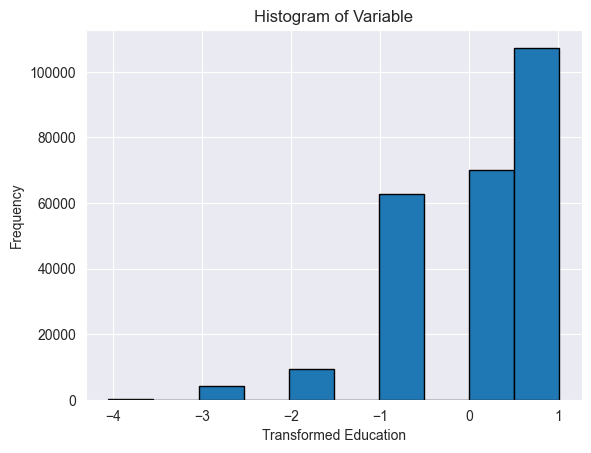

In [118]:
plt.hist(df_numerical['Education'], bins=10, edgecolor='black')
plt.title('Histogram of Variable')
plt.xlabel('Transformed Education')
plt.ylabel('Frequency')
plt.show()

# Linear correlations between individual variables
Let us study the correlation matrix of each variable pairs

# Eigenvector analysis
We perform a preliminary eigenvector analysis to find multivariate linearly correlated features and the linear combinations.

In [119]:
cov = np.cov(df_numerical.T)
cov

array([[ 1.        ,  0.08531016,  0.12114111,  0.23918537, -0.03661764,
        -0.10393202, -0.10006871],
       [ 0.08531016,  1.        ,  0.35361887,  0.30167439, -0.09206802,
        -0.10182969, -0.20980613],
       [ 0.12114111,  0.35361887,  1.        ,  0.52436364,  0.09912993,
        -0.15509252, -0.26679896],
       [ 0.23918537,  0.30167439,  0.52436364,  1.        ,  0.15244983,
        -0.28491153, -0.37001373],
       [-0.03661764, -0.09206802,  0.09912993,  0.15244983,  1.        ,
        -0.10190107, -0.12777528],
       [-0.10393202, -0.10182969, -0.15509252, -0.28491153, -0.10190107,
         1.        ,  0.44910642],
       [-0.10006871, -0.20980613, -0.26679896, -0.37001373, -0.12777528,
         0.44910642,  1.        ]])

In [120]:
eig_val, eig_vec = np.linalg.eig(cov)
# Get indices for sorting in descending order
sorted_indices = np.argsort(eig_val)[::-1]
# Sort eigenvalues and eigenvectors
sorted_eigenvalues = eig_val[sorted_indices]
sorted_eigenvectors = eig_vec[sorted_indices]

sorted_eigenvalues

array([2.32635109, 1.15878983, 0.97889928, 0.93574944, 0.62907764,
       0.53093328, 0.44019944])

There are no small (<0.1) values, and as such, there are no likely candidates for multivariate linear correlations. 

# Non-Linear Transformations
We will now widen the search of correlations by adding univariate non-linear transformations to the dataset, augmenting the number of candidate features.

In [121]:
added_cte = 1
for fea in df_numerical:
    new_values = df_numerical[fea] - np.min([df_numerical[fea].min(), 0]) + added_cte
    transformed_data, lambda_mle = stats.boxcox(new_values)
    print(f"Optimal Lambda (MLE) for {fea}:", lambda_mle)
    df_numerical[fea + '_boxcox'] = transformed_data

print(f"Now there are {len(df_numerical.columns)} features, : {df_numerical.columns}")

Optimal Lambda (MLE) for BMI: -0.47748793538676965
Optimal Lambda (MLE) for MentHlth: -3.5615959808052526
Optimal Lambda (MLE) for PhysHlth: -3.046727571326976
Optimal Lambda (MLE) for GenHlth: 0.45504286660453264
Optimal Lambda (MLE) for Age: 1.337856953197119
Optimal Lambda (MLE) for Education: 2.541335786787264
Optimal Lambda (MLE) for Income: 2.179681638829356
Now there are 14 features, : Index(['BMI', 'MentHlth', 'PhysHlth', 'GenHlth', 'Age', 'Education', 'Income',
       'BMI_boxcox', 'MentHlth_boxcox', 'PhysHlth_boxcox', 'GenHlth_boxcox',
       'Age_boxcox', 'Education_boxcox', 'Income_boxcox'],
      dtype='object')


# Repeating Eigenvalue Analysis
Now, with the new normalization transformations using BoxCox, we try again to see if they are correlated linearly with these new features.

In [122]:
cov = np.cov(df_numerical.T)
cov

array([[ 1.00000000e+00,  8.53101592e-02,  1.21141107e-01,
         2.39185373e-01, -3.66176352e-02, -1.03932022e-01,
        -1.00068710e-01,  1.34316508e-01,  8.13176690e-03,
         1.65993931e-02,  1.54099477e-01, -6.41143413e-02,
        -1.23492358e+00, -3.81947360e-01],
       [ 8.53101592e-02,  1.00000000e+00,  3.53618868e-01,
         3.01674393e-01, -9.20680239e-02, -1.01829695e-01,
        -2.09806127e-01,  9.90951127e-03,  8.47786669e-02,
         4.08543708e-02,  1.76994269e-01, -1.37738360e-01,
        -1.15678326e+00, -7.40077455e-01],
       [ 1.21141107e-01,  3.53618868e-01,  1.00000000e+00,
         5.24363644e-01,  9.91299251e-02, -1.55092517e-01,
        -2.66798962e-01,  1.47119611e-02,  3.05355228e-02,
         1.05061525e-01,  3.03012135e-01,  1.41667284e-01,
        -1.73082773e+00, -9.60762827e-01],
       [ 2.39185373e-01,  3.01674393e-01,  5.24363644e-01,
         1.00000000e+00,  1.52449830e-01, -2.84911532e-01,
        -3.70013734e-01,  3.33456415e-02,  2.

In [132]:
np.linalg.det(cov)

1.509639933314111e-12

In [123]:
eig_val, eig_vec = np.linalg.eig(cov)
# Get indices for sorting in descending order
sorted_indices = np.argsort(eig_val)
# Sort eigenvalues and eigenvectors
sorted_eigenvalues = eig_val[sorted_indices]
sorted_eigenvectors = eig_vec[sorted_indices]

sorted_eigenvalues

array([2.20742745e-03, 2.76833434e-03, 3.70345358e-03, 4.21069750e-03,
       5.30186783e-03, 2.62800978e-02, 3.56663387e-02, 5.27181848e-01,
       7.23069052e-01, 9.64838612e-01, 1.80454400e+00, 3.07446350e+00,
       1.18145560e+01, 1.32234241e+02])

There seem to be some linearly correlated features. If we use the eigenvector, we can estimate the linear combination of features that is supposed to be a constant.
If it is, we can derive from it a formula of the linear combination between the features involved.

Eigenvalue=0.0022074274480179835
[ 1.57529452e-03  8.54022084e-03  3.16586537e-03  6.01850949e-02
  2.21510331e-02 -1.79905000e-02  7.26448918e-02  5.84072675e-03
  3.86048368e-03 -6.46224624e-03  7.39101836e-01 -7.34842426e-04
 -2.58634726e-01 -6.13959237e-01]


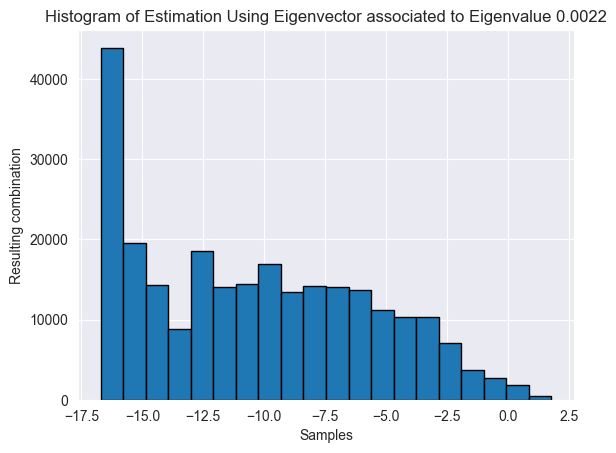

Eigenvalue=0.0027683343351193614
[ 1.40679375e-02  6.80578877e-02  8.13151199e-01 -2.98995852e-02
 -3.53988572e-03  1.10884491e-01 -6.80738675e-03  5.58342439e-03
  5.85405631e-03 -1.66361315e-01  1.65029788e-02 -5.40619758e-01
 -3.77000632e-04  2.05760293e-02]


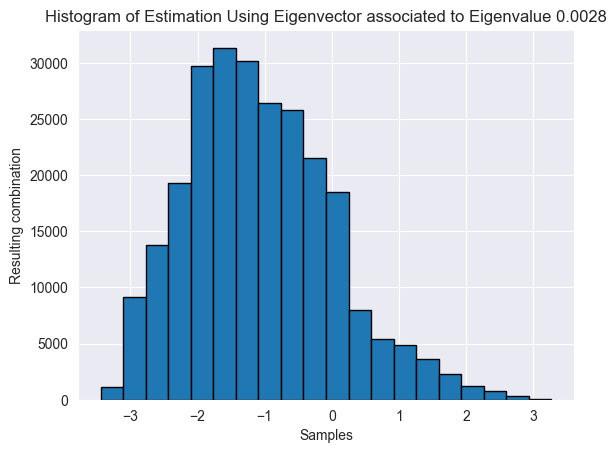

Eigenvalue=0.00370345357904648
[-0.16294855 -0.93964092  0.08229796  0.13623338  0.01618225 -0.00270938
 -0.00967038 -0.17138768 -0.18784763 -0.00300047  0.00609172 -0.00943526
  0.00521132  0.00217882]


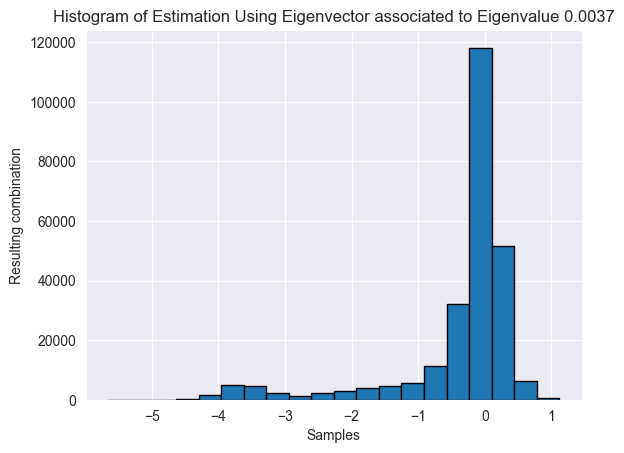

Eigenvalue=0.004210697502600816
[-9.81172793e-01  1.72141032e-01  3.69317288e-03  1.14416841e-02
 -5.68748347e-03 -4.34887259e-03 -4.51913046e-03 -6.38245301e-02
  5.80728502e-02 -1.37321278e-04  8.51215203e-04  3.11791075e-04
  2.05155594e-03  3.24707708e-04]


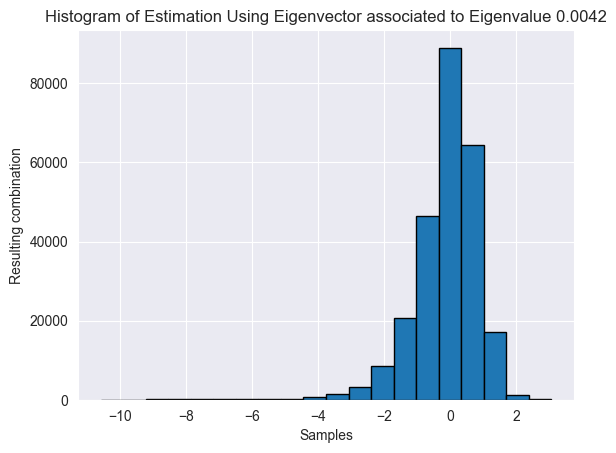

Eigenvalue=0.005301867828961547
[ 0.01602666  0.0530809   0.04220263  0.34624732 -0.0462955  -0.27088826
 -0.31144653  0.03822193  0.00364598  0.09304731  0.34376909 -0.01428323
  0.75097735  0.10126421]


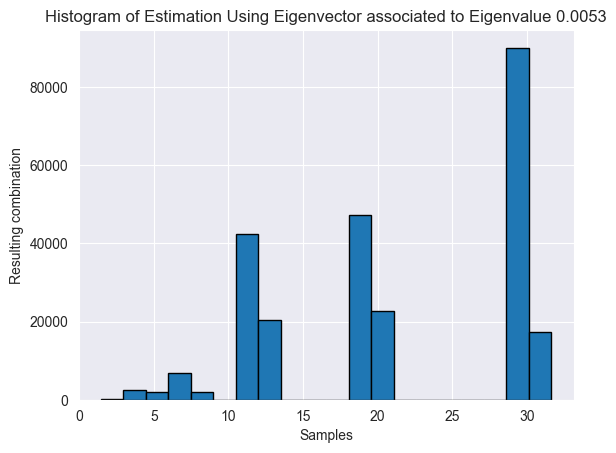

Eigenvalue=0.02628009780402994
[ 6.58066866e-04  5.03618890e-03 -1.31345119e-02  3.73467409e-02
  3.29457498e-02  6.00872184e-02 -2.36442001e-02  8.94380663e-03
  5.17820682e-03 -2.93892688e-02  5.22713946e-01  4.60914883e-02
 -3.42594330e-01  7.74245607e-01]


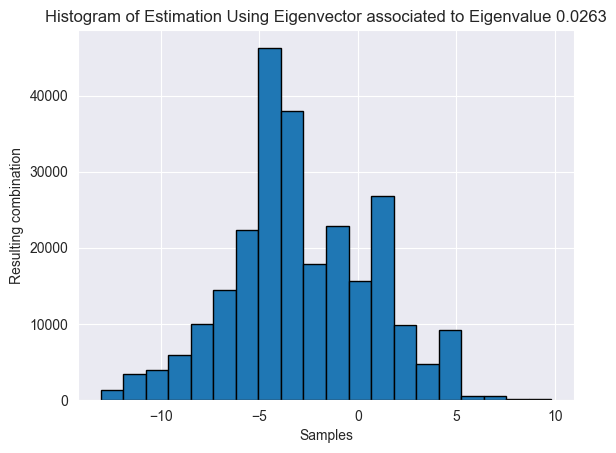

Eigenvalue=0.03566633867727239
[ 0.00144524  0.00183281 -0.00453382  0.03823441 -0.11873569  0.04403709
  0.01544679  0.00546552  0.00266564 -0.94052424  0.01857446  0.29035362
  0.11279178 -0.01552583]


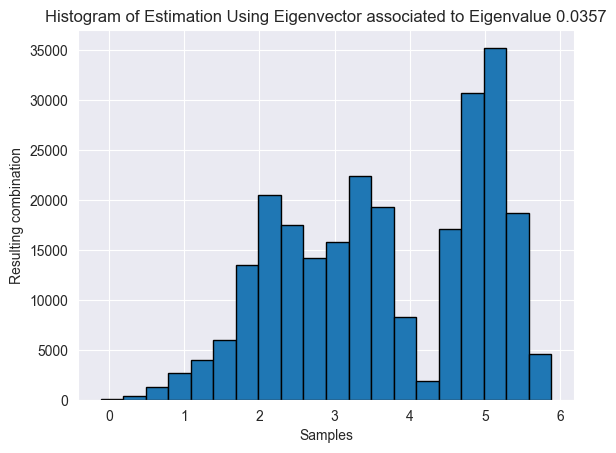

In [150]:
i = 0
threshold_eigenvalue = 0.1

while i < len(sorted_eigenvectors) and sorted_eigenvalues[i] < threshold_eigenvalue:
    scaled_eigenvec = sorted_eigenvectors[i] / np.linalg.norm(sorted_eigenvectors[i])
    print(f"Eigenvalue={sorted_eigenvalues[i]}")
    print(sorted_eigenvectors[i])
    
    estimation_of_cte = np.matmul(df_numerical.values, scaled_eigenvec)
    plt.hist(estimation_of_cte, bins=20, edgecolor='black')
    plt.title(f'Histogram of Estimation Using Eigenvector associated to Eigenvalue {sorted_eigenvalues[i]:.04f}')
    plt.xlabel('Samples')
    plt.ylabel(f'Resulting combination')
    plt.show()
    
    i += 1

Eigenvalue=0.0022074274480179835
0.7391018361268913, GenHlth_boxcox
-0.25863472593469816, Education_boxcox
-0.613959236749416, Income_boxcox
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.73910184  0.
 -0.25863473 -0.61395924]


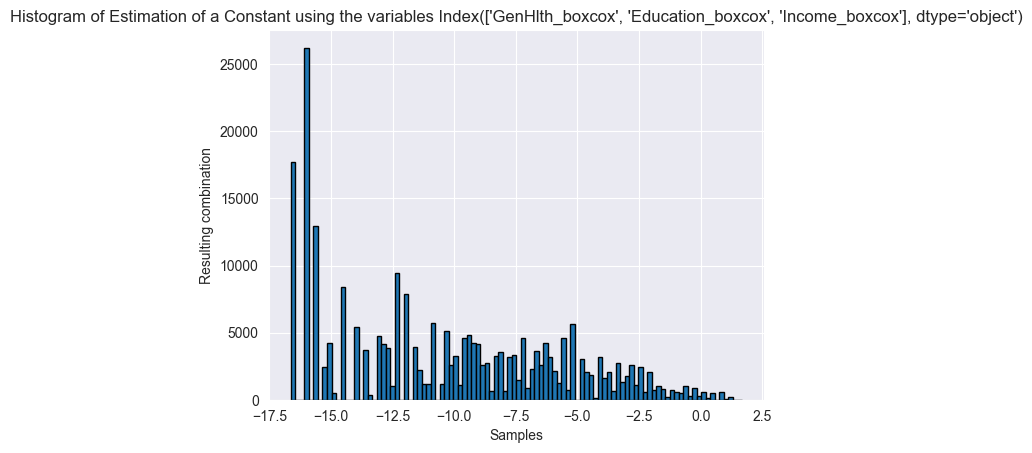


Eigenvalue=0.0027683343351193614
0.8131511987152316, PhysHlth
0.11088449126356226, Education
-0.16636131497480144, PhysHlth_boxcox
-0.5406197582779392, Age_boxcox
[ 0.          0.          0.8131512   0.          0.          0.11088449
  0.          0.          0.         -0.16636131  0.         -0.54061976
  0.          0.        ]


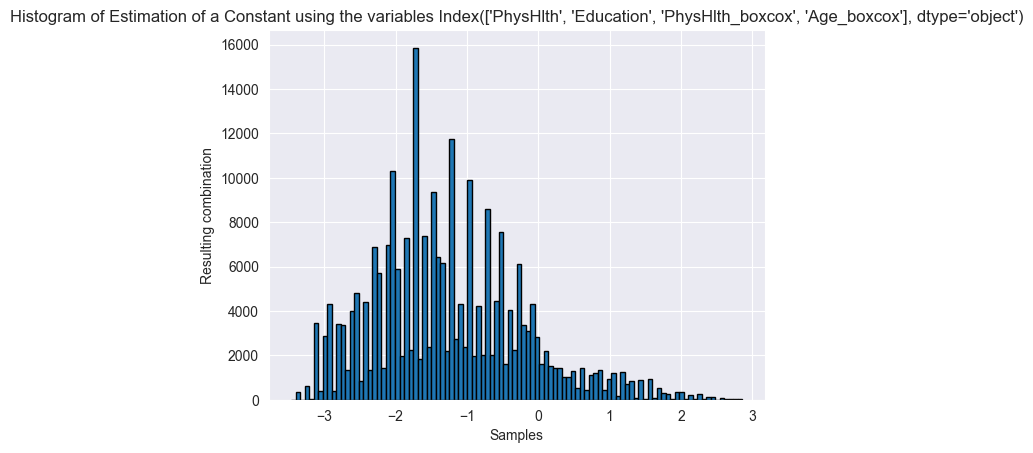


Eigenvalue=0.00370345357904648
-0.16294854988344276, BMI
-0.9396409153517905, MentHlth
0.13623338096982474, GenHlth
-0.17138767889286696, BMI_boxcox
-0.18784763229238977, MentHlth_boxcox
[-0.16294855 -0.93964092  0.          0.13623338  0.          0.
  0.         -0.17138768 -0.18784763  0.          0.          0.
  0.          0.        ]


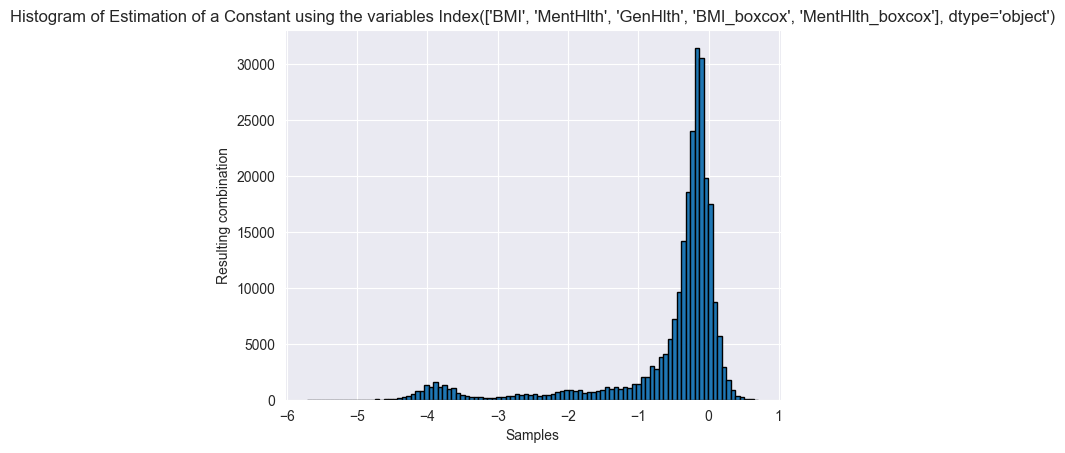


Eigenvalue=0.004210697502600816
-0.9811727927453902, BMI
0.17214103196718233, MentHlth
[-0.98117279  0.17214103  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


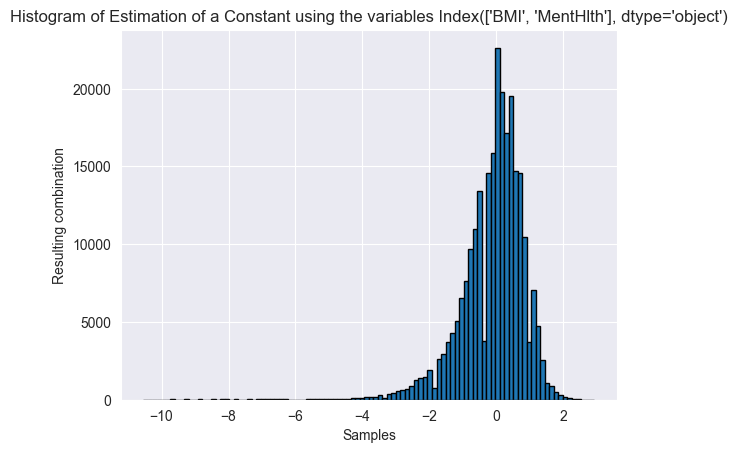


Eigenvalue=0.005301867828961547
0.3462473204331576, GenHlth
-0.27088826193429705, Education
-0.3114465328303525, Income
0.3437690943074635, GenHlth_boxcox
0.7509773482796102, Education_boxcox
[ 0.          0.          0.          0.34624732  0.         -0.27088826
 -0.31144653  0.          0.          0.          0.34376909  0.
  0.75097735  0.        ]


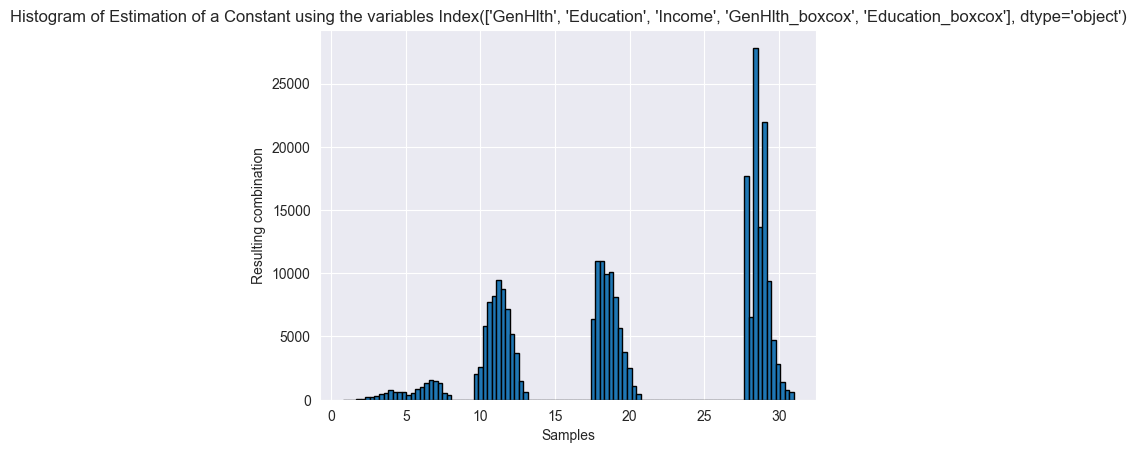


Eigenvalue=0.02628009780402994
0.5227139459402365, GenHlth_boxcox
-0.3425943302727452, Education_boxcox
0.7742456073634983, Income_boxcox
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.52271395  0.
 -0.34259433  0.77424561]


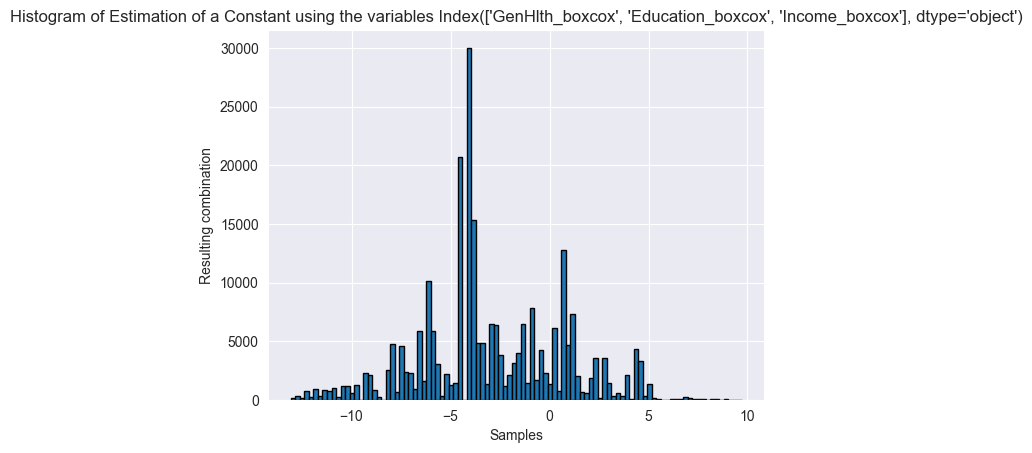


Eigenvalue=0.03566633867727239
-0.11873569282264711, Age
-0.9405242372837899, PhysHlth_boxcox
0.29035362262238923, Age_boxcox
0.11279178369494308, Education_boxcox
[ 0.          0.          0.          0.         -0.11873569  0.
  0.          0.          0.         -0.94052424  0.          0.29035362
  0.11279178  0.        ]


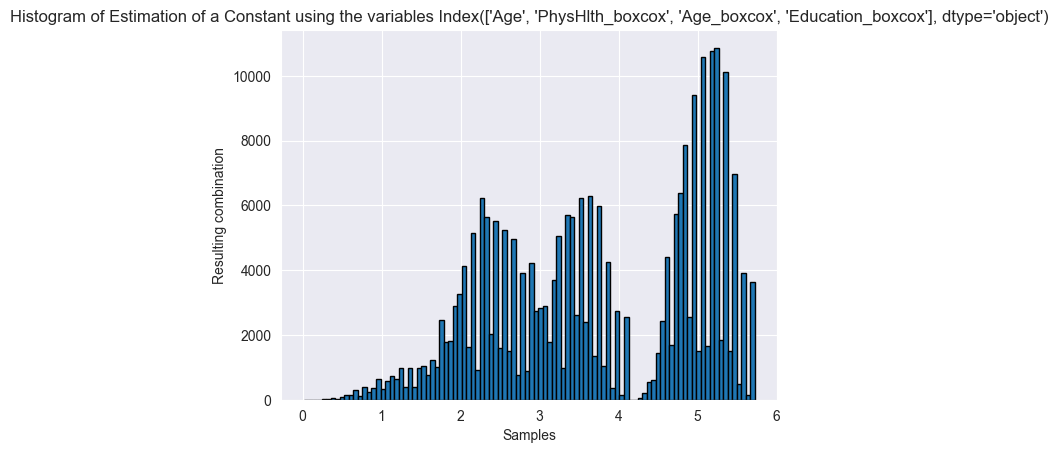

In [158]:
i = 0
threshold_eigenvalue = 0.1
threshold_eigenvector = 1.5 * 1 / len(sorted_eigenvectors)

while i < len(sorted_eigenvectors) and sorted_eigenvalues[i] < threshold_eigenvalue:
    scaled_eigenvec = sorted_eigenvectors[i]/np.linalg.norm(sorted_eigenvectors[i])
    print(f"Eigenvalue={sorted_eigenvalues[i]}")
    
    
    combinations = []
    for (j, pos_val) in enumerate(scaled_eigenvec):
        if np.abs(pos_val) > threshold_eigenvector:
            combinations.append((pos_val, df_numerical.columns[j]))
            print(f"{pos_val}, {df_numerical.columns[j]}")
        else:
            scaled_eigenvec[j] = 0
            
    print(scaled_eigenvec)
    
    vec = np.reshape(scaled_eigenvec, (-1, 1))
    estimation_of_cte = np.matmul(df_numerical.values, vec)
    plt.hist(estimation_of_cte, bins=100, edgecolor='black')
    plt.title(f'Histogram of Estimation of a Constant using the variables {df_numerical.columns[scaled_eigenvec != 0]}')
    plt.xlabel('Samples')
    plt.ylabel(f'Resulting combination')
    plt.show()
    
    
    print()
    i += 1

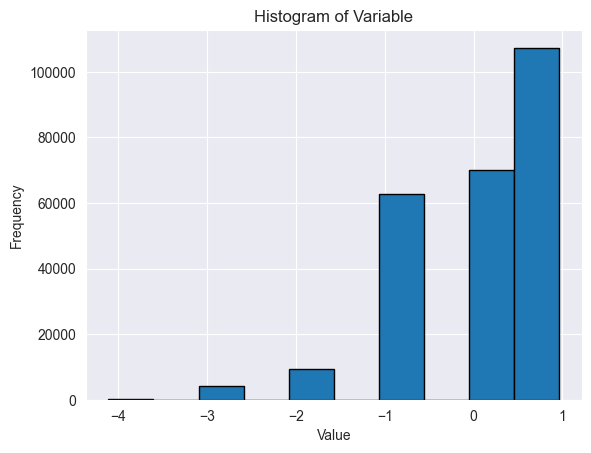

In [92]:
plt.hist(df_numerical['Education'], bins=10, edgecolor='black')
plt.title('Histogram of Variable')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()